# Mapeo de Hénon

- Hénon propuso, en 1976, un mapeo en 2D sencillo que exhibiera las propiedades esenciales del sistema de ecuaciones de primer orden acopladas propuestas por Lorentz, con el objetivo de poder estudiar de forma sencilla dichas propiedades.

- El mapeo imita una sección de Poincaré del atractor de Lorentz.

- El mapeo propuesto es el siguiente 

\begin{equation}
\begin{split}
    T:\,&x_{i+1}=y_{i+1}-ax_{i}^{2}\\
    &y_{i+1}=bx_{i}
\end{split}
\end{equation}





- Dicho mapeo se puede descomponer en tres etapas, i.e., $T\,=\,T'''T''T$. Si se toma como condición inicial una elipse:


![](doblamiento_T1.png)

- La primera etapa consiste en un doblamiento:

\begin{equation}
\begin{split}
    T':\,&x'=x\\
    &y'=y+1-ax^{2}
\end{split}
\end{equation}

![](doblamiento_T2.png)

- La segunda etapa consiste en una contracción en $x$:

\begin{equation}
\begin{split}
    T'':\,&x''=bx'\\
    &y''=y
\end{split}
\end{equation}


![](doblamiento_T3.png)

- La tercera etapa consiste en un reorientación en el eje x:

\begin{equation}
\begin{split}
    T''':\,&x'''=y''\\
    &y'''=x''
\end{split}
\end{equation}

![](doblamiento_T4.png)

- Es un mapeo con Jacobiano constante:

\begin{equation}
    \frac{\partial (x_{i+1},y_{i+1})}{\partial (x_{i},y_{i})}=-b
\end{equation}



- Tiene dos puntos invariantes

\begin{equation}
\begin{split}
    &x=\frac{-(1-b)\pm\sqrt{(1-b)^{2}+4a}}{2a}\\
    &y=bx
\end{split}
\end{equation}



- Dichos puntos son reales para 
\begin{equation}
a>a_{0}=-\frac{1}{4}(1-b)^{2}.
\end{equation}


En este caso, un punto es siempre linealmente inestable, mientras que el otro es inestable para 

\begin{equation}
a>a_{1}=\frac{3}{4}(1-b)^{2}.
\end{equation}

In [15]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

In [12]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

# Áreas

Para determinar para cuales constantes el mapeo es conservativo y disipativo, se implentó un algoritmo usando el método Monte Carlo para medir áreas de una figura irregular, en este caso la figura consiste de un círculo unitario que está dado por la parametrización:

$$ \sigma(t) = (cos t, sin t), \qquad t \in [0, 2 \pi].$$

Para medir el área de la figura después de iterarlo una vez con el mapeo de Hénon, se hace la compoción del 


El método consiste en los siguientes pasos:
- Poner la figura en un cuadrado que la contenga totalmente. El área del cuadrado se puede calcular fácilmente.
- Arrojar un número N de puntos en el cuadrado.
- Contar la cantidad de puntos que caen dentro de la figura.
una parametrización de un círculo y sus iteradas usando el mapeo de Hénon. El método consite usado consiste en los siguientes pasos:
- El área de la figura va a estar dada por la siguiente relación:

$$A_{figura} = A_{cuadrado}\frac{a_{in}}{N},$$

donde $a_in$ es el número de puntos que cae dentro de la figura, y $N$ es el total de puntos.

Se usó el método ["Inside Outside"](http://commons.bcit.ca/math/entertainment/inout/index.html) para determinar si un punto está dentro o fuera de una figua irregular.

In [1]:
"""
    in_or_out(para, x, y)

Función que evalúa si un punto dado por `x` y `y` está dentro de una figura dada por una parametrización
en forma de un array `para` creado usando la función `condiones_iniciales_2D`.

"""

function in_or_out(para, x, y)
    
    crossings = 0
    
    for i in 1:length(para[1,:])-1
        
        if x < para[1, i] && x < para[1, i+1] || x > para[1, i] && x > para[1, i+1]
            
            nothing
            
        elseif y > para[2,i] && y > para[2, i+1]
            
            nothing
    
        elseif y < para[2,i] && y < para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1] || x > para[1, i] && x < para[1, i+1]
                
                crossings += 1
                
            end
            
        elseif y > para[2, i] && y < para[2, i+1]
            
            if x > para[1, i] && x < para[1, i+1]
                
                y_c = para[2,i] + (para[2, i+1] - para[2, i])*(x - para[1, i])/(para[1, i+1] - para[1, i])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < para[2, i] && y > para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1]
                
                y_c = para[2, i+1] + (para[2, i] - para[2, i+1])*(x - para[1, i+1])/(para[1, i] - para[1, i+1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out

In [7]:
"""
    condiones_iniciales_2D(f::Function, t_range, a, b)

Función que guarda en un array de de 2×n una parametrización `f` para un rango `t_range`.
Los parámetros `a` y `b` sirven para parametrizaciones que requieran del mapeo de Hénon.

"""

function condiones_iniciales_2D(f::Function, t_range, a, b)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i], a, b)[1]
        CI[2, i] = f(t_range[i], a, b)[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D

In [8]:
"""
    iterator(f::Function, X0, a, b, N)

Itera un array `X0` usando un mapeo `f`, un número `N` de veces. `a` y `b` son parámetros del mapeo
Hénon.

"""


function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

iterator

In [2]:
"""
    invert_ceil(x)

Es una función que redondea hacia arriba un número positivo `x`, o si el número es negativo, lo redondea
hacia abajo.
"""

function invert_ceil(x)
    
    if x < 0 
        
        x = -ceil(abs(x))
        
    else
        
        x = ceil(x)
        
    end
    
    x
    
end

invert_ceil

In [6]:
"""
    randinterval(n, min, max)

La función da un arreglo con `n` números que son aleatorios en un intervalo definido por `min` y `max`.
"""

function randinterval(n, min, max)
    
    rand(n) * (max - min) + min
    
end

randinterval

In [3]:
"""
    enclosing_square(Param_array)

Es una función que dada una parametrización en forma de array `Param_array` que define una figura, 
calcula las coordenadas de un cuadrado que encierra completamente a esa figura.

"""

function enclosing_square(Param_array)
    
    x_min = invert_ceil(min(Param_array[1,:]...))
    x_max = invert_ceil(max(Param_array[1,:]...))
    y_min = invert_ceil(min(Param_array[2,:]...) )
    y_max = invert_ceil(max(Param_array[2,:]...))
    
    return (x_min, x_max), (y_min, y_max)
    
end

enclosing_square

In [4]:
"""
    itera_parametrizacion_henon(n)

Es una función que declara funciones anónimas que son la composición de la parametrización del círculo
unitario con el mapeo de Hénon. El parámetro `n` es el número de composiciones con el mapeo de Hénon.

"""

function itera_parametrizacion_henon(n)
    
    #1 - a*x^2 + y , b*x
    
    x = "cos(t)"
    y = "sin(t)"

    for i in 1:n

        xi = "1 - a*($x)^2 + ($y)"
        yi = "b*($x)"
        x = xi
        y = yi

    end

    ex = parse(x*" , "*y)
    ex_ret = :( (t, a, b) -> $ex )
    eval(ex_ret)
end  

itera_parametrizacion_henon

In [5]:
itera_parametrizacion_henon(3)(0, 1.4, 0.3)

(-0.7408864000000001,0.32280000000000003)

In [20]:
"""
    find_area(Σ::Function, t_range, N, a, b)

Función que calcula el área de una figura dada por una parametrización Σ, usando el método de 
Monte Carlo para calcular áreas. El rango `t_range`es el rango donde está definida la 
parametrizacion Σ, `N` es el número de puntos que se van a arrrojar para medir el área y los 
parámetros `a` y `b` son para las parametrizaciones de figuras que surgen de iterar el mapeo 
de Hénon. Para que funcione Σ debe tomar por argumentos Σ(t, a, b), aunque a y b no se 
requieran para la parametrización.


"""
function find_area(Σ::Function, t_range, N, a, b)
    
    parametrization = condiones_iniciales_2D(Σ, t_range, a, b)
    x_limites, y_limites = enclosing_square(parametrization)
    inside = 0
    total = N
    area = (x_limites[end] - x_limites[1]) * (y_limites[end] - y_limites[1])
    
    for i in 1:N
        
        x = randinterval(1, x_limites[1], x_limites[end])[1]
        y = randinterval(1, y_limites[1], y_limites[end])[1]
        
        if in_or_out(parametrization, x, y)
            
            inside += 1
            
        end
    end

    area * inside / total
    
end

find_area

In [24]:
t_rango = 0:0.01:2π

0.0:0.01:6.28

In [25]:
σ(t, a, b) = (cos(t), sin(t)) #parametrización del círculo.

σ (generic function with 1 method)

In [28]:
@time find_area(σ, t_rango, 1000000, 1.4, -1) #Área del círculo con 1 millon de puntos, param. 1.4 y -1 son irrelevantes

  5.879960 seconds (8.01 M allocations: 5.379 GB, 34.33% gc time)


3.143464

- ### Área para $b = 1$, $a=-1.4$.

In [13]:
t_rango = 0:0.001:2π
CI1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 1, )
CI1_2 = iterator(Henon, CI1_1, 1.4, 1, 1)
CI1_3 = iterator(Henon, CI1_2, 1.4, 1, 1)
CI1_4 = iterator(Henon, CI1_3, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 -3.81585  -3.82041  -3.82498  -3.82954  …  -3.80585  -3.81043  -3.815  
  1.776     1.77712   1.77824   1.77936      1.77355   1.77467   1.77579


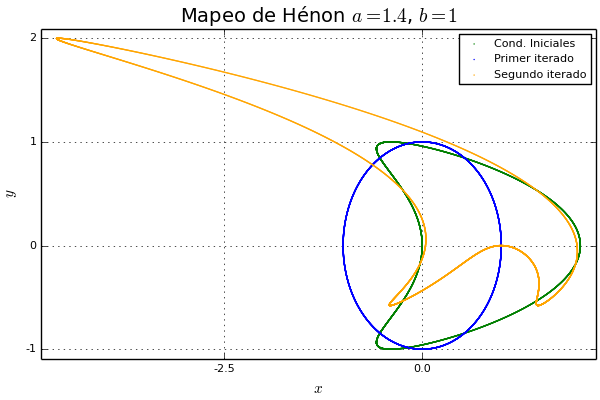

In [18]:
scatter(CI1_2[1,:], CI1_2[2,:], markersize=(1), markercolor=:green, label=("Cond. Iniciales"))
scatter!(CI1_1[1,:], CI1_1[2,:], markersize=(1), markercolor=:blue, label=("Primer iterado"))
scatter!(CI1_3[1,:], CI1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI1_4[1,:], CI1_4[2,:], markersize=(1), markercolor=:red, label=("Segundo iterado"))
xlabel!(L"x")
ylabel!(L"y")
title!(L"Mapeo de Hénon $a = 1.4$, $b=1$")

In [37]:
areas_b_1 = Float64[]

for i in 0:3
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, 1)
    push!(areas_b_1, a)
    
end

areas_b_1

4-element Array{Float64,1}:
 3.14137
 3.13829
 3.11968
 3.16344


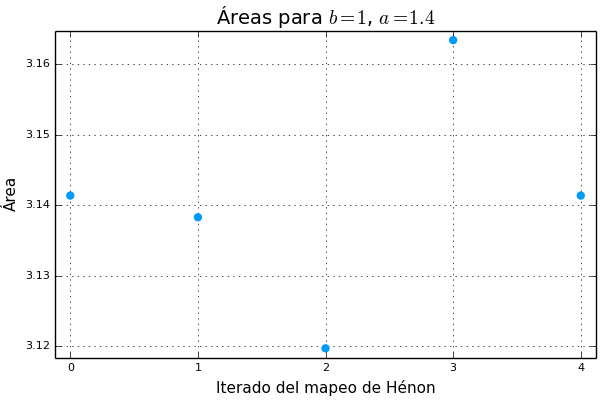

In [38]:
scatter(collect(0:3), areas_b_1, leg = false)
ylabel!("Área")
xlabel!("Iterado del mapeo de Hénon")
title!(L"Áreas para $b=1$, $a=1.4$")

- ### Área para $b = -1$, $a=-1.4$.

In [40]:
t_rango = 0:0.001:2π
CI_1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, -1)
CI_1_2 = iterator(Henon, CI_1_1, 1.4, -1, 1)
CI_1_3 = iterator(Henon, CI_1_2, 1.4, -1, 1)
CI_1_4 = iterator(Henon, CI_1_3, 1.4, -1, 1)

2×6284 Array{Float64,2}:
 1.32975  1.32945   1.32915   1.32884   …  1.33039   1.3301    1.32981 
 0.224    0.222879  0.221757  0.220634     0.226444  0.225327  0.224208


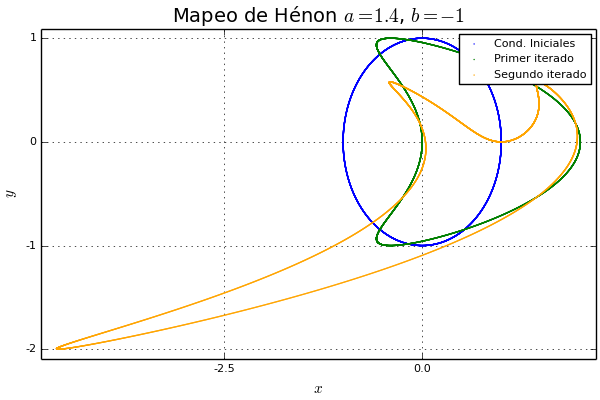

In [41]:
scatter(CI_1_1[1,:], CI_1_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI_1_2[1,:], CI_1_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI_1_3[1,:], CI_1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI_1_4[1,:], CI_1_4[2,:], markersize=(1), markercolor=:red, label=("Tercer iterado"))
title!(L"Mapeo de Hénon $a = 1.4$, $b=-1$")
xlabel!(L"x")
ylabel!(L"y")

In [50]:
areas_b__1 = Float64[]

for i in 0:3
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, -1)
    push!(areas_b__1, a)
    
end

areas_b__1

4-element Array{Float64,1}:
 3.14094
 3.13862
 3.12373
 3.16609


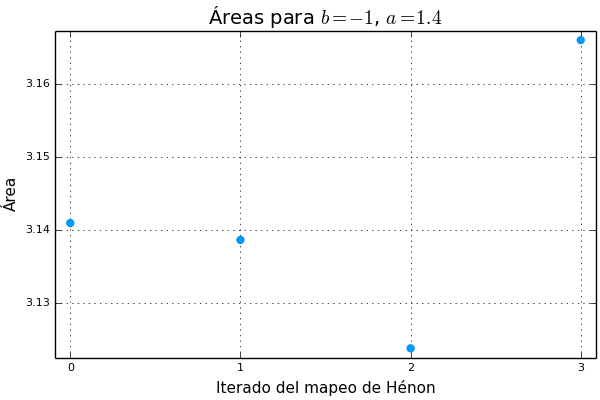

In [52]:
scatter(collect(0:3), areas_b__1, leg = false)
ylabel!("Área")
xlabel!("Iterado del mapeo de Hénon")
title!(L"Áreas para $b=-1$, $a=1.4$")

- ### Área para $b = 0.3$, $a=-1.4$.

In [44]:
t_rango = 0:0.001:2π
CI03_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 0.3)
CI03_2 = iterator(Henon, CI03_1, 1.4, 0.3, 1)
CI03_3 = iterator(Henon, CI03_2, 1.4, 0.3, 1)
CI03_4 = iterator(Henon, CI03_3, 1.4, 0.3, 1)

2×6284 Array{Float64,2}:
 -0.740886  -0.743962  -0.747041  …  -0.734175  -0.737244  -0.740317
  0.3228     0.323136   0.323472      0.322066   0.322402   0.322738


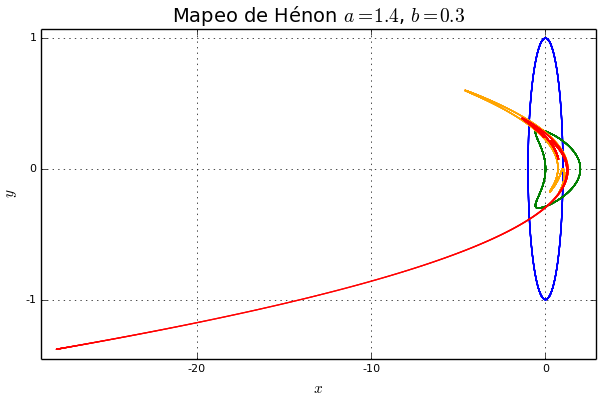

In [45]:
scatter(CI03_1[1,:], CI03_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI03_2[1,:], CI03_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI03_3[1,:], CI03_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
scatter!(CI03_4[1,:], CI03_4[2,:], markersize=(1), markercolor=:red, leg=false)
title!(L"Mapeo de Hénon $a = 1.4$, $b=0.3$")
xlabel!(L"x")
ylabel!(L"y")

In [49]:
areas_b_03 = Float64[]

for i in 0:3
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, 0.3)
    push!(areas_b_03, a)
    
end

areas_b_03

4-element Array{Float64,1}:
 3.14235 
 0.944106
 0.282282
 0.088815


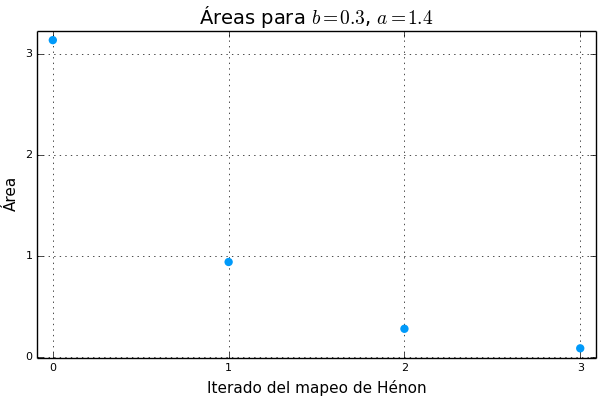

In [53]:
scatter(collect(0:3), areas_b_03, leg = false)
ylabel!("Área")
xlabel!("Iterado del mapeo de Hénon")
title!(L"Áreas para $b=0.3$, $a=1.4$")

# Caso conservativo 

- En este caso b=-1

![](JS_b_p1.gif)

Hola

# Caso disipativo